In [28]:
reset -fs

In [48]:
from __future__ import print_function, division

In [29]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from random import randint
import time
from time import sleep

# Scrape using beautiful soup

In [30]:
#scrape mojobox office movie link pages
years = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
responses = []
for year in years:
    url = 'https://www.boxofficemojo.com/year/'+ str(year) + '/?grossesOption=totalGrosses' 
    responses.append(requests.get(url))

In [85]:
#print(responses)

In [32]:
# scrape movie link for url and store the links in urls_list
url_list =[]
for response in responses:
    response.text
    page = response.text
    document = BeautifulSoup(page, "lxml")
    urls = document.find_all('a',)

    for link in urls:
        url = link.get("href")
        if url.startswith("/release"):
            url_list.append("https://www.boxofficemojo.com/" + link.get("href"))
            #print("https://www.boxofficemojo.com/" + link.get("href"))
print(len(url_list))

2000


In [42]:
# scrape movie details from each movie links
def movie_details(url_list):
    
    movie_name = []
    domestic_gross=[]
    inter_gross=[]
    world_gross=[]
    rel_date=[]
    MPAA_rating = []
    running_time = []
    genres = []
    opening = []
    widest_release = []
    movie_budget = []
    in_release =[]

    for i in url_list:
        response = requests.get(i)

        page1 = response.text
        p = BeautifulSoup(page1, "lxml")
        
        time.sleep(1)

        #scrape movie title
        try:  
            title=p.find('h1', class_='a-size-extra-large').text
            movie_name.append(title)
        except Exception as error:
            movie_name.append(np.nan)

        #scrape movie budget   
        try:
            budget = p.find('span', text = 'Budget').find_next('span', class_='money').text
            movie_budget.append(budget)
        except Exception as error:
            movie_budget.append(np.nan)

        #doemestic gross               
        try:
            domestic =p.find('span', class_='a-size-medium a-text-bold').text.split()[0]
            domestic_gross.append(domestic)
        except Exception as error:
            domestic_gross.append(np.nan)

        # international gross 
        try:
            int_gr=p.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            inter_gross.append(int_gr)
        except Exception as error:
            inter_gross.append(np.nan)

        #worldwide gross
        try: 
            world_gr = p.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            world_gross.append(world_gr)
        except Exception as error:
            world_gross.append(np.nan)

        #domestic opening amount
        try:
            domestic_open = p.find('span', text = 'Opening').find_next('span', class_='money').text
            opening.append(domestic_open)
        except Exception as error:
            opening.append(np.nan)


        #release date 
        try:
            release_date= p.find('span', text = 'Release Date').find_next('span').a.text
            rel_date.append(release_date)
        except Exception as error:
            rel_date.append(np.nan)

        #running time
        try:
            run_time= p.find('span', text = 'Running Time').find_next('span').text
            running_time.append(run_time)
        except Exception as error:
            running_time.append(np.nan)

        #genres
        try:
            movie_genre= p.find('span', text = 'Genres').find_next('span').text
            genres.append(movie_genre)
        except Exception as error:
            genres.append(np.nan)

        #rating
        try: 
            rating= p.find('span', text = 'MPAA').find_next('span').text
            MPAA_rating.append(rating)
        except Exception as error:
            MPAA_rating.append(np.nan)

        #widest release
        try: 
            wide_re= p.find('span', text = 'Widest Release').find_next('span').text
            widest_release.append(wide_re)
        except Exception as error:
            widest_release.append(np.nan)
            
        #in release
        try: 
            re= p.find('span', text = 'In Release').find_next('span').text
            in_release.append(wide_re)
        except Exception as error:
            in_release.append(np.nan)
            
            
            
    movies_dict = {'movie_name':movie_name,'domestic_gross':domestic_gross,'movie_budget':movie_budget, 
     'inter_gross':inter_gross,'world_gross':world_gross, 'opening':opening,'rel_date':rel_date, 
     'running_time':running_time, 'genres':genres,'MPAA_rating':MPAA_rating, 'widest_release':widest_release}


    data = pd.DataFrame(movies_dict)
    return data
        

In [40]:
#print(document)

In [43]:
df2 = movie_details(url_list)
df2.head(5)

,movie_name,domestic_gross,movie_budget,inter_gross,world_gross,opening,rel_date,running_time,genres,MPAA_rating,widest_release
0,Bad Boys for Life,"$206,305,244","$90,000,000","$220,200,000","$426,505,244","$62,504,105","Jan 17, 2020",2 hr 4 min,Action\n \n Comedy\n \n Cr...,R,"3,775 theaters"
1,Sonic the Hedgehog,"$148,974,665","$85,000,000","$170,741,018","$319,715,683","$58,018,348","Feb 14, 2020",1 hr 39 min,Action\n \n Adventure\n \n ...,PG,"4,198 theaters"
2,Birds of Prey,"$84,158,461","$84,500,000","$117,700,000","$201,858,461","$33,010,017","Feb 7, 2020",1 hr 49 min,Action\n \n Adventure\n \n ...,R,"4,236 theaters"
3,Dolittle,"$77,047,065","$175,000,000","$168,391,379","$245,438,444","$21,844,045","Jan 17, 2020",1 hr 41 min,Adventure\n \n Comedy\n \n ...,PG,"4,155 theaters"
4,The Invisible Man,"$70,410,000","$7,000,000","$72,741,000","$143,151,000","$28,205,665","Feb 28, 2020",2 hr 4 min,Drama\n \n Horror\n \n Mys...,R,"3,636 theaters"


In [45]:
#df1.head()

In [46]:
df2.shape

(2000, 11)

In [55]:
for index, item in df2.widest_release.iteritems():
    
    if type(item) == str:
        numeric_filter = filter(str.isdigit, item)
        numeric_string = "".join(numeric_filter)
        df2.widest_release.replace(item, int(numeric_string), inplace=True)

In [56]:
df2['rel_date']= pd.to_datetime(df2['rel_date'])
df2['rel_year'] = df2['rel_date'].dt.year
df2['rel_month'] = df2['rel_date'].dt.month

In [99]:
#df2.dtypes
#df2.info()

In [86]:
hrs=np.zeros(len(df2['running_time'])) #return a new array of shape 1187, filled with zeros

for i in range(0,len(df2['running_time'])): #for i in range
    try:
#         print(df2_fl['Runtime'][i][0],i)  #grab print i (hr) aka num of hr, and row
#         df2_fl['Runtime'][i-1][0] # --> returns i for first row (2)
        hrs[i]=int(df2['running_time'][i][0]) #returns first hr 
    except:
        hrs[i]=0  #fill w 0
        print(i) #973 rows with 0

359
1786


In [87]:
df2['running_time'][i] #'1 hr 37 min'
df2['running_time'][i].split('hr')  # splits hr out to get: ['1 ', ' 37 min']
df2['running_time'][i].split('hr')[1] #' 37 min'
df2['running_time'][i].split('hr')[1].strip() #get rid of whitespace
df2['running_time'][i].split('hr')[1].strip().split('min') #splits string to ['37 ', '']
df2['running_time'][i].split('hr')[1].strip().split('min')[0] #grab first index
df2['running_time'][i].split('hr')[1].strip().split('min')[0].strip() #get rid of whitespace!

'41'

In [88]:
mins = np.zeros(len(df2['running_time']))
for i in range(0,len(df2['running_time'])):
    try:
        #print(df2_fl['Runtime'][i][0],i)
        mins[i]=int(df2['running_time'][i].split('hr')[1].strip().split('min')[0].strip())
                                         #.split('min')[0].strip()[0]))
    except:
        mins[i]=0
        print(i,df2['running_time'][i])

92 2 hr
114 2 hr
148 2 hr
160 2 hr
191 2 hr
192 2 hr
297 2 hr
306 2 hr
359 nan
369 2 hr
416 2 hr
467 2 hr
495 2 hr
538 2 hr
539 42 min
585 2 hr
586 2 hr
609 2 hr
664 2 hr
732 2 hr
734 2 hr
773 48 min
826 2 hr
846 2 hr
905 2 hr
915 2 hr
917 46 min
967 2 hr
985 2 hr
1020 2 hr
1026 2 hr
1044 2 hr
1081 2 hr
1115 2 hr
1327 39 min
1387 2 hr
1398 2 hr
1399 2 hr
1427 3 hr
1538 44 min
1540 40 min
1577 3 hr
1621 2 hr
1723 40 min
1775 2 hr
1779 2 hr
1786 nan
1799 40 min
1833 2 hr
1905 40 min
1935 2 hr
1950 40 min
1969 2 hr


In [89]:
runtime = hrs*60+mins #do math
runtime

array([124.,  99., 109., ..., 102., 104., 101.])

In [90]:
m = np.where(runtime==0)  #.where = return elements chosen from x or y depending on condition. --> runtime=0
runtime[m]=np.mean(runtime)

In [94]:
df2['running_time']=runtime #set = to col

In [75]:
df2['MPAA_rating'].value_counts()

R            753
PG-13        735
PG           292
G             21
Not Rated      2
NC-17          2
Name: MPAA_rating, dtype: int64

In [81]:
dummy_rating = pd.get_dummies(df2['MPAA_rating'])

In [83]:
df2 = pd.concat([df2, dummy_rating], axis=1)
#df2.head(10)

In [97]:
df2 = df2.loc[:,~df2.columns.duplicated()]
df2.head()

,movie_name,domestic_gross,movie_budget,inter_gross,world_gross,opening,rel_date,running_time,genres,MPAA_rating,widest_release,rel_year,rel_month,run_time,G,NC-17,Not Rated,PG,PG-13,R
0,Bad Boys for Life,"$206,305,244","$90,000,000","$220,200,000","$426,505,244","$62,504,105",2020-01-17,124.0,Action\n \n Comedy\n \n Cr...,R,3775.0,2020.0,1.0,None,0,0,0,0,0,1
1,Sonic the Hedgehog,"$148,974,665","$85,000,000","$170,741,018","$319,715,683","$58,018,348",2020-02-14,99.0,Action\n \n Adventure\n \n ...,PG,4198.0,2020.0,2.0,None,0,0,0,1,0,0
2,Birds of Prey,"$84,158,461","$84,500,000","$117,700,000","$201,858,461","$33,010,017",2020-02-07,109.0,Action\n \n Adventure\n \n ...,R,4236.0,2020.0,2.0,None,0,0,0,0,0,1
3,Dolittle,"$77,047,065","$175,000,000","$168,391,379","$245,438,444","$21,844,045",2020-01-17,101.0,Adventure\n \n Comedy\n \n ...,PG,4155.0,2020.0,1.0,None,0,0,0,1,0,0
4,The Invisible Man,"$70,410,000","$7,000,000","$72,741,000","$143,151,000","$28,205,665",2020-02-28,124.0,Drama\n \n Horror\n \n Mys...,R,3636.0,2020.0,2.0,None,0,0,0,0,0,1


In [100]:
df3 = df2.drop('run_time',1)
df3.head(2)

/var/folders/dy/63r9w1v578v1x17vwmwhknwm0000gn/T/ipykernel_64714/632433978.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3 = df2.drop('run_time',1)


,movie_name,domestic_gross,movie_budget,inter_gross,world_gross,opening,rel_date,running_time,genres,MPAA_rating,widest_release,rel_year,rel_month,G,NC-17,Not Rated,PG,PG-13,R
0,Bad Boys for Life,"$206,305,244","$90,000,000","$220,200,000","$426,505,244","$62,504,105",2020-01-17,124.0,Action\n \n Comedy\n \n Cr...,R,3775.0,2020.0,1.0,0,0,0,0,0,1
1,Sonic the Hedgehog,"$148,974,665","$85,000,000","$170,741,018","$319,715,683","$58,018,348",2020-02-14,99.0,Action\n \n Adventure\n \n ...,PG,4198.0,2020.0,2.0,0,0,0,1,0,0


In [102]:
genres = df3['genres']

In [105]:
df3.genres1 = df3.genres.str.split('\n')

/var/folders/dy/63r9w1v578v1x17vwmwhknwm0000gn/T/ipykernel_64714/4111617169.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df3.genres1 = df3.genres.str.split('\n')


In [117]:
df3.head(2)

,movie_name,domestic_gross,movie_budget,inter_gross,world_gross,opening,rel_date,running_time,genres,MPAA_rating,widest_release,rel_year,rel_month,G,NC-17,Not Rated,PG,PG-13,R
0,Bad Boys for Life,"$206,305,244","$90,000,000","$220,200,000","$426,505,244","$62,504,105",2020-01-17,124.0,Action\n \n Comedy\n \n Cr...,R,3775.0,2020.0,1.0,0,0,0,0,0,1
1,Sonic the Hedgehog,"$148,974,665","$85,000,000","$170,741,018","$319,715,683","$58,018,348",2020-02-14,99.0,Action\n \n Adventure\n \n ...,PG,4198.0,2020.0,2.0,0,0,0,1,0,0


In [122]:
'''df3Copy = df3.copy()
df3Copy.genres = df3Copy.genres.str.replace(" ","")
df3Copy.genres = df3Copy.genres.str.split('\n\n')

df3Copy.head(2)
df3Copy.genres
'''

0                [Action, Comedy, Crime, Thriller]
1              [Action, Adventure, Comedy, Sci-Fi]
2               [Action, Adventure, Comedy, Crime]
3             [Adventure, Comedy, Family, Fantasy]
4       [Drama, Horror, Mystery, Sci-Fi, Thriller]
                           ...                    
1995                              [Drama, Romance]
1996                  [Biography, Drama, Thriller]
1997                                       [Drama]
1998                              [Drama, History]
1999                             [Comedy, Romance]
Name: genres, Length: 2000, dtype: object

In [123]:
df3.genres = df3.genres.str.replace(" ","")
df3.genres = df3.genres.str.split('\n\n')
df3.head(2)

,movie_name,domestic_gross,movie_budget,inter_gross,world_gross,opening,rel_date,running_time,genres,MPAA_rating,widest_release,rel_year,rel_month,G,NC-17,Not Rated,PG,PG-13,R
0,Bad Boys for Life,"$206,305,244","$90,000,000","$220,200,000","$426,505,244","$62,504,105",2020-01-17,124.0,"[Action, Comedy, Crime, Thriller]",R,3775.0,2020.0,1.0,0,0,0,0,0,1
1,Sonic the Hedgehog,"$148,974,665","$85,000,000","$170,741,018","$319,715,683","$58,018,348",2020-02-14,99.0,"[Action, Adventure, Comedy, Sci-Fi]",PG,4198.0,2020.0,2.0,0,0,0,1,0,0


In [125]:
df4 = df3['genres'].str.join(sep='*').str.get_dummies(sep='*')

In [126]:
df5 = pd.concat([df3, df4], axis=1)
df5.head(3)

,movie_name,domestic_gross,movie_budget,inter_gross,world_gross,opening,rel_date,running_time,genres,MPAA_rating,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Bad Boys for Life,"$206,305,244","$90,000,000","$220,200,000","$426,505,244","$62,504,105",2020-01-17,124.0,"[Action, Comedy, Crime, Thriller]",R,...,0,0,0,0,0,0,0,1,0,0
1,Sonic the Hedgehog,"$148,974,665","$85,000,000","$170,741,018","$319,715,683","$58,018,348",2020-02-14,99.0,"[Action, Adventure, Comedy, Sci-Fi]",PG,...,0,0,0,0,1,0,0,0,0,0
2,Birds of Prey,"$84,158,461","$84,500,000","$117,700,000","$201,858,461","$33,010,017",2020-02-07,109.0,"[Action, Adventure, Comedy, Crime]",R,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# removed all the unnecessary
df5.columns

Index(['movie_name', 'domestic_gross', 'movie_budget', 'running_time',
       'widest_release', 'rel_year', 'rel_month', 'G', 'NC-17', 'Not Rated',
       'PG', 'PG-13', 'R', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [137]:
df5.head(2)

,movie_name,domestic_gross,movie_budget,running_time,widest_release,rel_year,rel_month,G,NC-17,Not Rated,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Bad Boys for Life,"$206,305,244","$90,000,000",124.0,3775.0,2020.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Sonic the Hedgehog,"$148,974,665","$85,000,000",99.0,4198.0,2020.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [146]:
#saved in csv file
df5.to_csv('final_data.csv')

In [147]:
#fill NaN with zeros
df5 = df5.fillna(0)

In [148]:
df6 = df5

In [150]:
#df6Copy = df6.copy()

In [162]:
#remove commas and dollar signs from monetary columns
df6[df6.columns[1:3]] = df6[df6.columns[1:3]].replace('[\$,]', '', regex=True).astype(float)

In [163]:
df6.head()

,movie_name,domestic_gross,movie_budget,running_time,widest_release,rel_year,rel_month,G,NC-17,Not Rated,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Bad Boys for Life,206305244.0,90000000.0,124.0,3775.0,2020.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Sonic the Hedgehog,148974665.0,85000000.0,99.0,4198.0,2020.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Birds of Prey,84158461.0,84500000.0,109.0,4236.0,2020.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dolittle,77047065.0,175000000.0,101.0,4155.0,2020.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Invisible Man,70410000.0,7000000.0,124.0,3636.0,2020.0,2.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [164]:
df6.shape

(2000, 36)

In [165]:
#divide money columns by 1000000 to get smaller numbers to work with
df6['domestic_gross'] = df6['domestic_gross'].apply(lambda x: x/1000000)
#df['Int_Gross_mil'] = df['Int_Gross_mil'].apply(lambda x: x/1000000)
#df['Worldwide_mil'] = df['Worldwide_mil'].apply(lambda x: x/1000000)
#df['Opening_mil'] = df['Opening_mil'].apply(lambda x: x/1000000)
df6['movie_budget'] = df6['movie_budget'].apply(lambda x: x/1000000)

In [166]:
df6.head()

,movie_name,domestic_gross,movie_budget,running_time,widest_release,rel_year,rel_month,G,NC-17,Not Rated,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Bad Boys for Life,206.305244,90.0,124.0,3775.0,2020.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Sonic the Hedgehog,148.974665,85.0,99.0,4198.0,2020.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Birds of Prey,84.158461,84.5,109.0,4236.0,2020.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dolittle,77.047065,175.0,101.0,4155.0,2020.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Invisible Man,70.410000,7.0,124.0,3636.0,2020.0,2.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [167]:
#df6Copy = df6.copy()

In [171]:
#DROPPING ROWS WITH ZEROS IN PROFIT AND BUDGET
df6 = df6[df6.domestic_gross != 0.0]
df6 = df6[df6.movie_budget != 0.0]


In [173]:
df6.shape

(1070, 36)

In [178]:
#saved in csv file
df6.to_csv('final_data1.csv')

In [174]:
df6.tail()

,movie_name,domestic_gross,movie_budget,running_time,widest_release,rel_year,rel_month,G,NC-17,Not Rated,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1984,A Better Life,1.759252,10.0,98.0,216.0,2011.0,6.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1986,Take Shelter,1.730296,5.0,121.0,91.0,2011.0,9.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1991,The Double Hour,1.514942,4.3,95.0,68.0,2011.0,4.0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1996,The Devil's Double,1.361512,19.1,109.0,89.0,2011.0,7.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1998,Snow Flower and the Secret Fan,1.348205,6.0,104.0,116.0,2011.0,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [176]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline

In [187]:
df6 = df6.dropna(how='any', axis = 0)

In [238]:
#df6 = df6.drop('Short', 1)

In [204]:
#saved it to csv
df6.to_csv('final_data2.csv')

In [216]:
#df6.corr()

In [205]:
#sns.pairplot(df6);

In [207]:
feature_df = df6.drop(['PG', 'PG-13', 'R'],axis=1)

In [217]:
#feature_df.corr()

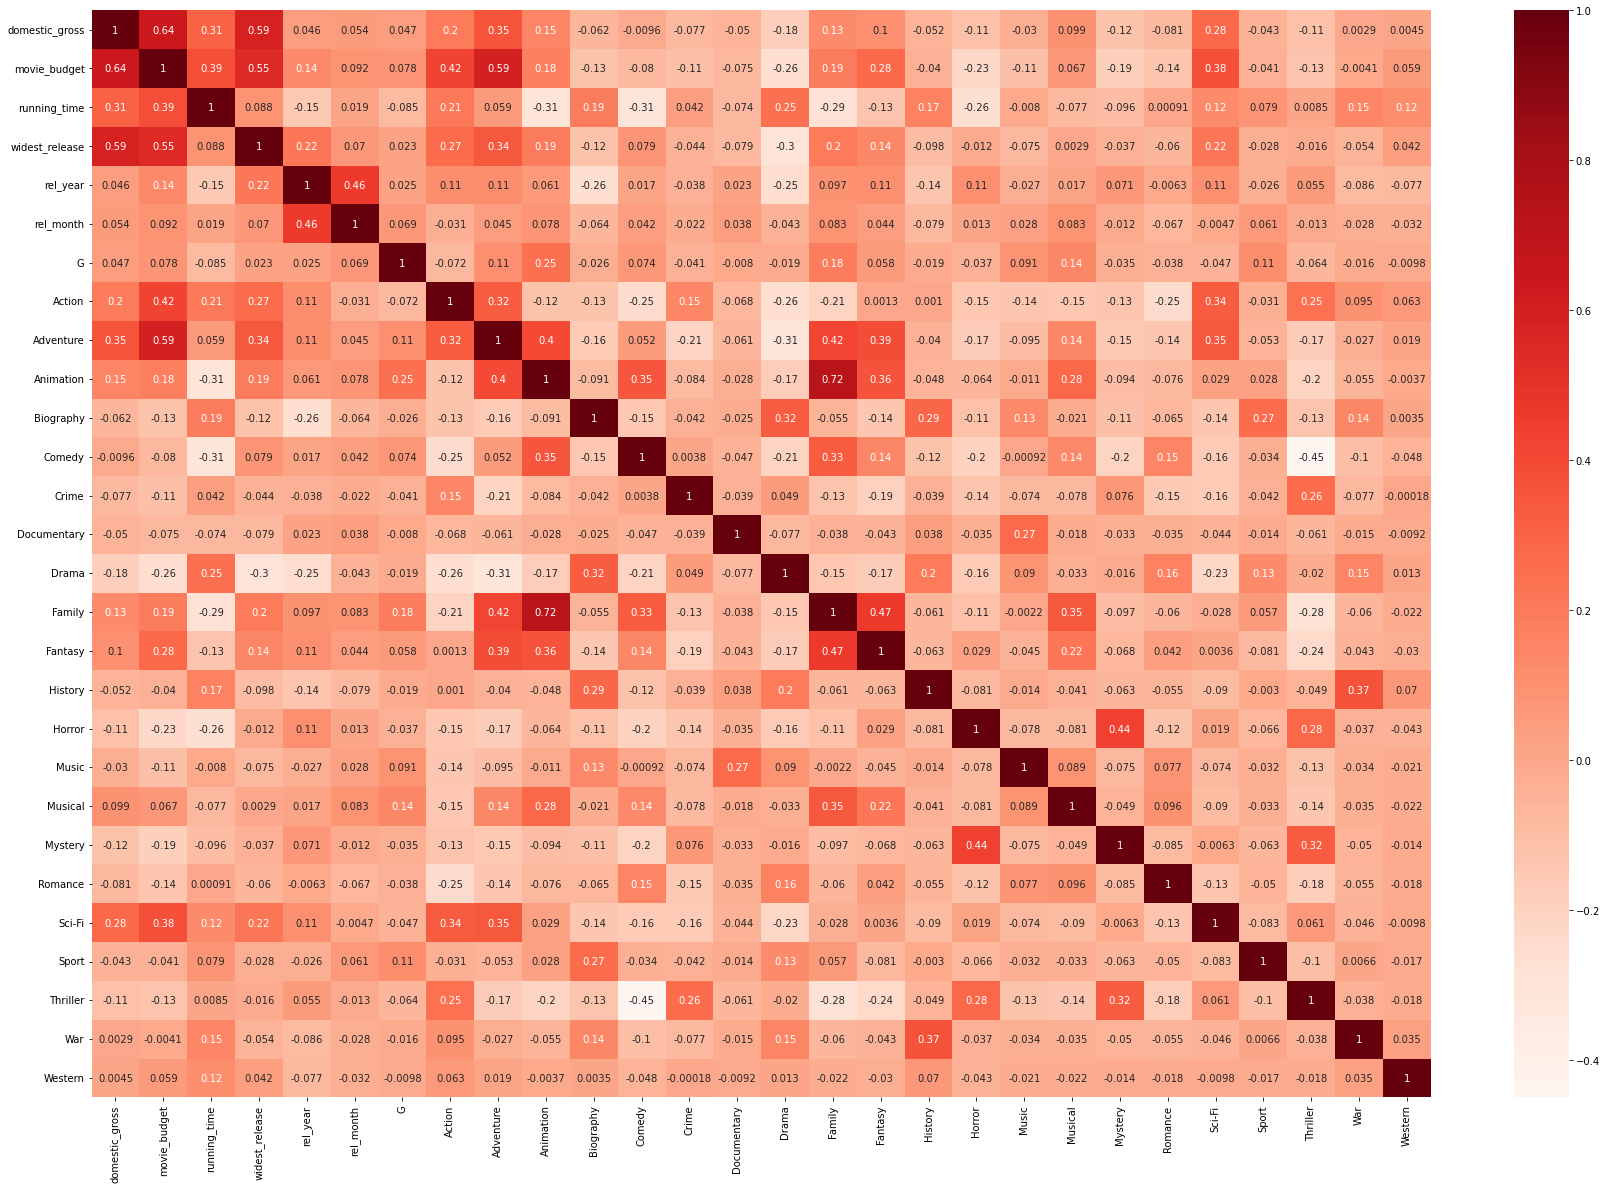

In [246]:
# removed some features to see correlation in the data
fig = plt.gcf()
fig.set_size_inches(30, 20)
sns.heatmap(feature_df.corr(), cmap = 'Reds', annot = True);
plt.savefig('HeatMap', dpi=200,bbox_inches="tight")

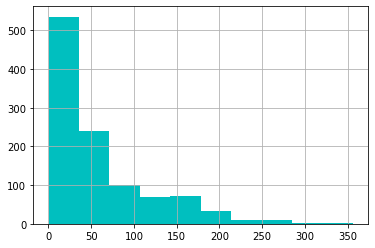

In [245]:
#histogram of movie budget 
df6.movie_budget.hist(color='c', lw=2);
plt.savefig('budget', dpi=200,bbox_inches="tight")

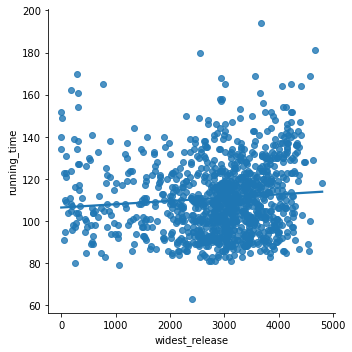

In [244]:
sns.lmplot(x ="widest_release", y ="running_time", data = feature_df, order = 1, ci = None)
plt.savefig('WideVsRuntime', dpi=200,bbox_inches="tight")

In [240]:
#sns.lmplot(x ="widest_release", y ="Adventure", data = feature_df, order = 1, ci = None)

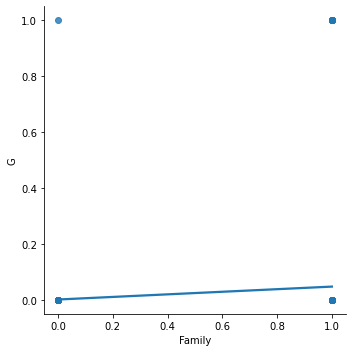

In [236]:
#sns.lmplot(x ="Family", y ="G", data = feature_df, order = 1, ci = None) 

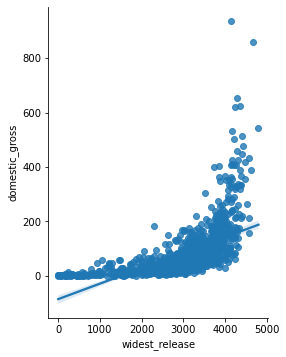

In [243]:
sns.pairplot(feature_df, x_vars=['widest_release'], y_vars=['domestic_gross'],
             height=5, aspect=.8, kind="reg");
plt.savefig('WideVsDom', dpi=200,bbox_inches="tight")

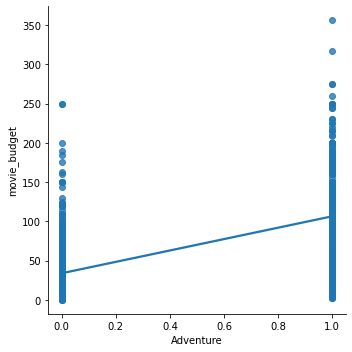

In [242]:
sns.lmplot(x ="Adventure", y ="movie_budget", data = feature_df, order = 1, ci = None)
plt.savefig('AdvVsbudg', dpi=200,bbox_inches="tight")

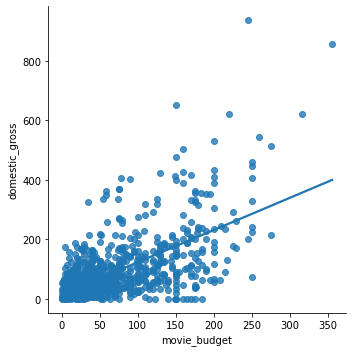

In [241]:
sns.lmplot(x ="movie_budget", y ="domestic_gross", data = feature_df, order = 1, ci = None)
plt.savefig('budgVsDom_Gr', dpi=200,bbox_inches="tight")